## Introduction

Your goal is to assess the trade-offs of stability, accuracy, and run-time of a least two methods applied to two ODE systems. 

The first ODE system is two proteins degrading. The ODEs are:

\begin{eqnarray*}
\frac{dy_1}{dt}&=&-\alpha y_1\\
\frac{dy_2}{dt}&=&-\beta y_2\\
\end{eqnarray*}

where $\alpha=0.1$ and $\beta=0.2$.

The second ODE system is the Lotka-Volterra model of predator-prey populations and their interactions. You can check out the Wikipedia entry to learn more, but what you need to know here is that it is a 2-ODE system and that, with the right parameter values, it leads to oscillations. The ODEs are:

\begin{align*}
\frac{dx}{dt} &= \alpha x -\beta x y\\
\frac{dy}{dt} &= -\gamma y + \delta x y\\
\end{align*}

where $\alpha=0.25$, $\beta=0.01$, $\gamma=1$, and $\delta=0.01$.


## The Project

Consider three methods -- the forward Euler method, the explicit trapezoidal method, and an adaptive step-size forward Euler method (that uses the trapezoidal method to estimate the local error).

Compare the performance of each of your three methods on the degradation and predator-prey systems.  In your analysis, you will want to consider both efficiency (how long does it take the method to run?) and accuracy (how close is the method to the "true" solution?). For the first two methods, be sure to consider the effect of step-size on accuracy and speed. For the third, be sure to analyze the step-sizes chosen and the effect of error tolerance on the step size. 


## Extensions

This project will be more interesting if you tackle one or more of these extensions.  Feel free to develop your own extension. And, as always, a particularly thorough analysis is smiled upon.

<ul>
<li> Analyze the van der Pol oscillator in addition to the models above. The equations for it are:
\begin{align*}
\frac{dy_1}{dt} &= y_2\\
\frac{dy_2}{dt} &= \mu (1-y_1^2)y_2 - y_1.\\
\end{align*}
When $\mu=50$, the period of oscillation is long (nearly 80) and the system is stiff. When $\mu=1$, the period is short (approximately 6) and the system is not stiff. We expect implicit methods to perform better on the stiff system. Demonstrate that it is better to use the implicit method when $\mu=50$, but that explicit methods are perfectly adequate when $\mu=1$.
<li> Implement additional explicit Runge-Kutta methods. In particular, it would be nice to see the results of a fourth order method.
<li> Implement Adams-Bashforth method (this should be covered in Lecture 15).
<li> Implement the Backward Euler method and compare its results to those of your other methods. (Note that backward euler is an implicit method, which means the solution at the new time step appears on both sides of the equation and, therefore, requires additional computation. For example, you will need to use Newton's method to approximately solve a nonlinear system of algebraic equations. If you chose to use Backward Euler, consult Stephanie before writing code.)

</ul>

## Notes

### Timing
To time your method, use the <a href="https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit">%timeit</a> magic command. You use it either for a single line of code, e.g.   

<code>
%timeit (t,y) = forwardEuler( models.protein_degradation, np.arange(0,50,0.01), np.array([1,1]), params)
</code>

or to time an entire cell, e.g.
<code>
%%timeit
(t,y) = forwardEuler( models.protein_degradation, np.arange(0,50,0.01), np.array([1,1]), params)   
</code>

If you use it in cell mode, then be sure to put just the solving code in the cell. Put any plotting code in a different cell, because you don't want to include that.

### Accuracy
To compute the accuracy of your method, compare its output to the output of scipy.integrate.solve_ivp (which will stand in for the "true solution"). Set its relative tolerance so that it is "tight" (i.e. you will tolerate very little error; rtol=1e-8).  Error calculations should be performed by comparing the solutions to $y$ at the same time steps, but you will likely be comparing the true solution to outputs from methods using lots of different time steps. The easiest way to handle this is to call scipy.integrate.solve_ivp for each unique set of timesteps you have. For example, when you use the adaptive step size function, you do not know ahead of time which timesteps you will have, so run that first, and use the output to set the t_eval parameter for solve_ivp:
<code>
(t,y,steps) = forwardEulerAdaptiveStepSize( models.protein_degradation, 0, 50, 
    np.array([1,1]), params, 1e-4)
sol = scipy.integrate.solve_ivp(fun=models.protein_degradation, t_span=(0,50), y0=(1,1), 
                                method='LSODA', t_eval=t, args=[params], rtol=1e-8, atol=1e-8 )
</code>
    
To compute the error, use one of the methods we described in Lecture 11 (first, compute the error at each time point, then summarize it over time).

### Table of content
#### I.Introduction
Introduce the methods and the accompanying codes
#### II.Evaluation 
#### III. Visual inspection of the methods 
#### IV. Sensitivity analysis
##### a. Does tolerance for Newton method impact MSE of the backward Euler solution?
##### b. Does h impact how the methods break down on the predator-prey model? 


#### V.  Benchmarking performance 
#####  a. Time 
##### b. Accuracy 
#### VI.  Conclusion



## I. Introduction



Here, we wrote two test ODE models to validate our methods, the protein degradation and predator-prey model. Five methods were implemented: the forward euler, the backward euler, the explicit trapezoidal, the Adams-Bashford, and finally the adaptive forward euler method. Here, the Adams-Bashford method is generalized for any desirable steps and time step $h$.

Each ODE model will have their own unique characteristics, which will shed light on how good the methods are. Each model will have input as $y$, and output as a vector of size $(n,)$, in which $n$ is the number of equations.  First, let's look at how the methods are implemented.

### 1. The forward euler method 
This one is the most simple yet effective method available. Basically, this can be seen as an one step method:
$$y[:,i+1]=y[:,i]+h*model(y[:,i])$$
, in which $y[:,i]$ is the value at the $i+1$-th step of $y$, and $model(y[:,i]$ is the value of the ODE of $y$ at a given instance $y[:,i]$

### 2. The explicit trapezoidal method 
Formulaically speaking, the next value of $y$ is defined by:
$$y[:,i+1]=y[:,i]+step*(model(0,y[:,i],params)+model(0,y[:,i+1],params))/2$$,
in which the $y[:,i+1]$ plugged into the right side is first calculated using the FE method given above. Each of 
### 3. The backward euler method
This method is somewhat different from the forward euler method. In this method, the value of $y[:,i+1]$ is dependent on the slope of $y[:,i+1]$ itself.  That is, instead of using the above approximation, we use:
$$y[:,i+1]=y[:,i]+h*model(y[:,i+1])$$
And thus, y[:,i+1] can be seen as the zero for the equation: 
$$y[:,i]+h*model(x)-x=0$$
To solve for $x$, we will use the Newton method. Let g(x)=y[:,i]+h*model(x)-x, we calculate the jacobian matrix dg(y)/y, which we numerically approximate below using the ad hoc function jacobian, and find $x$ through several iterations:
### 4. Adaptive Forward euler method:
  Unlike the previous method, this method can be seen as utilizing a set of flexible time step, and still take the advantages of the simple forward euler method.  A good time step at each turn can be considered as the one that minimize the difference between the $y$ values given by the FE and the ET method. How good is the difference depends on our error tolerence value. The process of finding the appropriate step size can continue til the end of the simulation.
    
### 5. The Adams-Bashford method: 
The Adams-Bashford is a multistep method that determines $y[:,t+1]$ by using the value of  $y[:,t], y[:,t-1], y[:,t-2]$,... and ,$y[:,t-n]$:
$$y_{n+t}=y_{n+t-1}+ h(\sum_{i=1}^{t-1} b_i model(y_{n+i}))$$,
in which $h$ is the constant time step, and $b_i$ are the coefficients. They can be determined as the following: 
$$b_{s-j-1}=\frac{(-1)^j}{j!(s-j-1)!} \int_0^1 ( \prod_{i=0,i \neq j}^{s-1} (u+i))du $$
Here, we use the package sympy to do the differentiations.




In [1]:
import scipy.integrate 
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp 
import math 
# the model:
def proteindegradation(t,y,params):
    #A model for  protein degradation
    dydt=np.zeros((2,))
    dydt[0]=-params[0]*y[0]
    dydt[1]=-params[1]*y[1]
    return dydt

def predatorprey(t,y,params):
    #A predator-prey model: 
    a=params[0]
    b=params[1]
    g=params[2]
    s=params[3]
    X=y[0]
    Y=y[1]
    dydt=np.zeros((2,))
    dydt[0]=a*X-b*X*Y
    dydt[1]=-g*Y+s*X*Y
    return dydt


#numerial estimation of the jacobian matrix: 
def jacobian(func,y,step):
    #model is the function f
    change=np.ones((y.shape[0],y.shape[0]))
    for i in range(0,y.shape[0]):
        y_shifted=np.array(y,dtype='float64')
        
        y_shifted[i]=y[i]*step
        change[:,i]=func(y_shifted)-func(y)
    step=y*(step-1)
    step.shape=(y.shape[0],1)
    step=step**-1
    return change@np.diagflat(step)
    
#A function for the backward Euler method:
def backwardEuler(model,ti,tf,y0,params,step,rtol):
    Ts = np.arange(ti,tf+step,step)
    y=np.zeros((y0.shape[0],Ts.shape[0]))
    y[:,0]=y0
    for i in range(0,y.shape[1]-1):
    #solve for the following:
                
        ysolve_now=y0
        #initialize an arbitrary zero:
        ysolve_prior=0
        #Newton raphson to solve for a=0. Only terminates when all is below rtol:
        while(np.any(np.abs(ysolve_now-ysolve_prior)>rtol)):
            #calculate the inversed jacobian 
             
            func = lambda x: y[:,i]+model(0,x,params)*step-x
            jacobian_mat=jacobian(func,ysolve_now,1.00001)
            ysolve_prior=ysolve_now
            change=scipy.linalg.solve(jacobian_mat,-func(ysolve_prior))
            ysolve_now=change+ysolve_prior 
        #the final solution:
        y[:,i+1]=ysolve_now
    return y
        
#A function for the Adams-Bashford method with chosen step: 
def AB(model,ti,tf,y0,params,step,h):
    #Initialize the list of coefficient
    coefs=[]
    Ts = np.arange(ti,tf+h,h)
    y=np.zeros((y0.shape[0],Ts.shape[0]))
    df=np.zeros((y0.shape[0],Ts.shape[0]))
    #Assume that we can initialize the first k values:
    #This can be done with RK45
    mod = lambda t,y: model(t,y,params)
    sol=scipy.integrate.solve_ivp(fun=mod,t_span=(ti,ti+h*step),y0=y0,t_eval=np.arange(ti,ti+h*step,h),method='RK45', rtol=1e-8, atol=1e-8 )
    y[:,0:step]=sol.y[:,0:step]
    #Finding the coefficients and initialize ys:
    for j in range(0,step):
        first=((-1)**j)/math.factorial(j)/math.factorial(step-j-1)
        prods=["(x+"+str(i)+")" for i in range(0,j)]
        prods2=["(x+"+str(i)+")" for i in range(j+1,step)]
        prods=prods+prods2
        prods="*".join(prods)
        #Using formula: 
        a=sp.integrate(prods,(sp.symbols('x'),0,1))
        coefs.append(first*a)
        df[:,j]=model(0,sol.y[:,j],params)
    
   
    coefs=np.array(coefs)
   
    #Now estimations:
    for i in range(step,y.shape[1]):
        y[:,i]=y[:,i-1]+h*df[:,i-step:i]@coefs
        df[:,i]=model(0,y[:,i],params)
    return y 


def forward_euler(model,ti,tf,y0,params,step):
    #input: model, t_span, yinit, params 
    #output: estimated ys
    Ts = np.arange(ti,tf+step,step)
    y=np.zeros((y0.shape[0],Ts.shape[0]))
    y[:,0]=y0
    for i in range(0,y.shape[1]-1): 
        y[:,i+1]=y[:,i]+step*model(0,y[:,i],params) 
    return y

def trapezoidal(model,ti,tf,y0,params,step):
    #input: mode
    #output: estimated ys
    Ts = np.arange(ti,tf+step,step)
    y=np.zeros((y0.shape[0],Ts.shape[0]))
    y[:,0]=y0
    for i in range(0,y.shape[1]-1):
        y[:,i+1]=y[:,i]+step*model(0,y[:,i],params)
        y[:,i+1]=y[:,i]+step*(model(0,y[:,i],params)+model(0,y[:,i+1],params))/2
    return y
                          
def adaptive_FE(model,ti,tf,y0,params,etol=1e-8):
    #Adaptive Forward Euler mmethod: 
    h=(tf-ti)/100             
    t = [ti]
    steps = []
    y = [np.array(y0)]
    while t[-1] < tf:
        yi = y[-1];
        YFE =yi + h * model(t[0],yi,params);
        YET = yi + h/2 * model(t[-1],yi,params) + h/2 * model(t[-1]+h,YFE,params);
        err = np.linalg.norm(YET-YFE,2);
        if err <= etol:
            # The step size was small enough.  Record this
            # info and determine the next step size.
            t.append( t[-1] + h );
            steps.append(h);
            y.append(YFE)
        hnew = h * np.sqrt(0.9*etol/err);
        # Make sure h doesn't more than double
        if hnew >= 2*h:
            hnew = 2*h;
        h = hnew;


    t = np.array(t)
    y = np.array(y).T
    steps = np.array(steps)
    return (t,y,steps)

In [ ]:
params=(0.1,0.2)
params2=(0.25,0.01,1,0.01)

h=[5e-5,1e-4,5e-4,0.001,0.002, 0.005,0.01,0.02,0.03]
AB_steps=np.arange(1,9,1)
epsilon=[1e-10,5e-10,1e-9,5e-9,1e-8,5e-8,1e-7,5e-7,1e-6,5e-6,1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2]


## II. Evaluation
A new function for our evaluation purpose is written below. It is a general function for all five methods, so there might be parameters that will only be used for one method. 

First, except for the adaptive FE method, a 'true' solution is generated using the scipy.integrate.solve_ivp function. MSE is used to measure the error rate, and this together with the approximated solution and the true solution will be outputted. 

In [7]:
import time as time 
def evaluation(step,method,model,ti,tf,params,y0,epsilon=0.01,h=0.5,rtol=1e-8):
    #input: tstep: can be a vector  or a scalar:
    
    # h can be used to  control for the tolerence of the adaptive FE method, but can also be used for the number 
    #of steps for the Adams-Bashford method, or the tolerance for the Newton method to find the zero in the Backward Euler method
    
    
    start=time.time()
    (err,ys,true)=(0,0,0)
    
    true=0
    mod = lambda t,y: model(t,y,params)
    sol=scipy.integrate.solve_ivp(fun=mod,t_span=(ti,tf+step),y0=y0,t_eval=np.arange(ti,tf+step,step),method='LSODA', rtol=rtol, atol=1e-8 )
    if method=="forward euler":
        ys=forward_euler(model,ti,tf,np.array(y0),params,step)    
        (err,true)=(np.mean((ys-sol.y)**2),sol.y)
        end=time.time()
        return err,ys,true,end-start 
             
    elif method=="trapezoidal":
        ys=trapezoidal(model,ti,tf,np.array(y0),params,step)
        (err,true)=(np.mean((ys-sol.y)**2),sol.y)
        end=time.time()
        return err,ys,true,end-start              
    elif method=="AB":
        ys=AB(model,ti,tf,y0,params,step,h)
        sol=scipy.integrate.solve_ivp(fun=mod,t_span=(ti,tf+h),y0=y0,t_eval=np.arange(ti,tf+h,h),method='LSODA', rtol=rtol, atol=1e-8 )
        (err,true)=(np.mean((ys-sol.y)**2),sol.y)
        end=time.time()
        return err,ys,true,end-start        
             
    elif method=="adaptiveFE":
        (t,ys,h)=adaptive_FE(model,ti,tf,np.array(y0),params,epsilon)
        sol=scipy.integrate.solve_ivp(fun=mod,t_span=(ti,t[-1]),y0=y0,t_eval=t,method='LSODA', rtol=rtol, atol=1e-8)
        end=time.time()

        return t,ys,np.mean((ys-sol.y)**2),sol.y,end-start 
            
    elif method=="backward euler":
        ys=backwardEuler(model,ti,tf,y0,params,step,rtol=epsilon)
        (err,true)=(np.mean((ys-sol.y)**2),sol.y)
        end=time.time()
        return err,ys,true,end-start           

        

    

### III. Visual inspection of the methods 
One way to visually validate the accuracy of our method is to plot them out, the  approximated and the 'true' solution. The parameters in this section are usually chosen ad hoc to find an appropropriate solution that we deem fit. Here, two models are being used simultaneously. Each model has its own unique characteristic, and so this can shed light on the strength and weakness of each numerical method. 

#### 1. Forward Euler, explicit trapezoidal, and backward Euler


In [9]:
params=(0.1,0.2)
params2=(0.25,0.01,1,0.01)
steps=[1e-6,2e-6,5e-6,1e-5,2e-5,5e-5,0.001,0.002, 0.005,0.01,0.02,0.05,0.09,0.1,0.2,0.5,0.9,1,1.5,2,2.5,3,5]



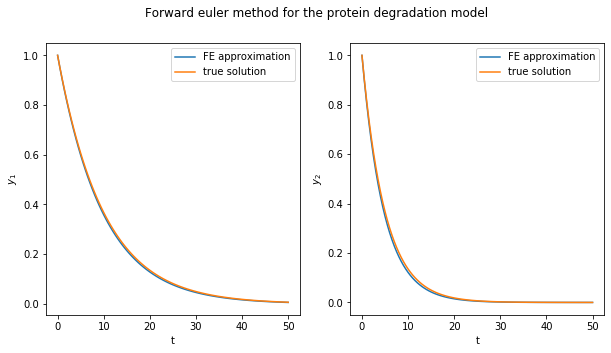

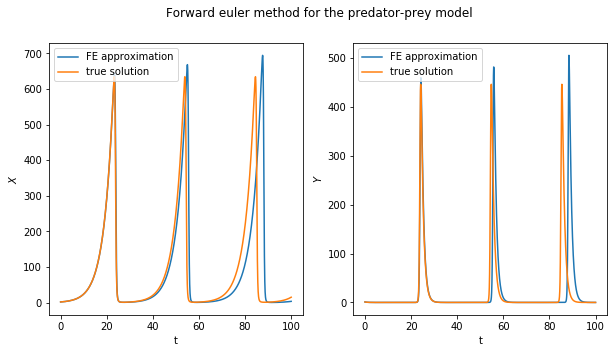

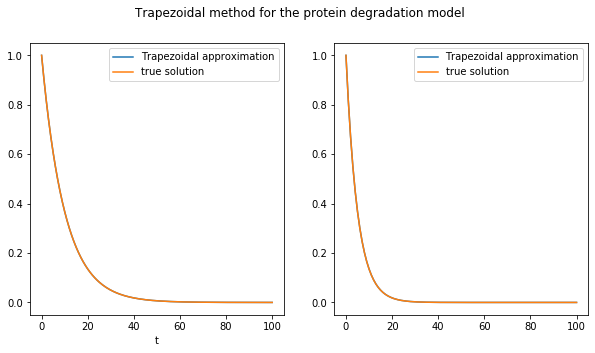

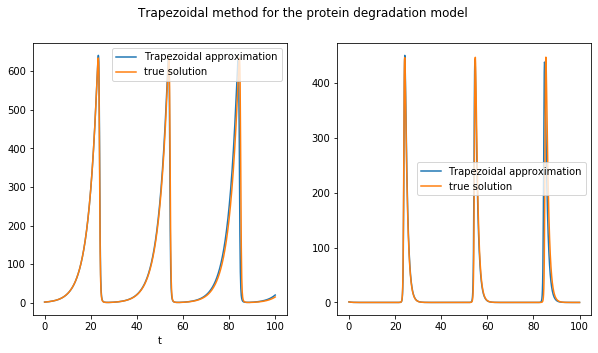

In [8]:
#Protein degradation+ FE, step = 0.5
FE_test1=evaluation(step=0.5,method="forward euler",ti=0,tf=50,params=params,model=proteindegradation,y0=np.array([1,1]))
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(np.arange(0,50.5,0.5),FE_test1[1][0,:],label="FE approximation")
ax[0].plot(np.arange(0,50.5,0.5),FE_test1[2][0,:],label="true solution")
ax[1].plot(np.arange(0,50.5,0.5),FE_test1[1][1,:],label="FE approximation")
ax[1].plot(np.arange(0,50.5,0.5),FE_test1[2][1,:],label="true solution")
ax[0].set_xlabel("t")
ax[1].set_xlabel("t")
ax[0].set_ylabel("$y_1$")
ax[1].set_ylabel("$y_2$")
ax[0].legend()
ax[1].legend()
plt.suptitle("Forward euler method for the protein degradation model")
plt.show()

#Predator-prey+ FE, step=0.01

FE_test2=evaluation(step=0.01,method="forward euler",ti=0,tf=100,params=params2,model=predatorprey,y0=np.array([2,1]))
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(np.arange(0,100.01,0.01),FE_test2[1][0,:],label="FE approximation")
ax[0].plot(np.arange(0,100.01,0.01),FE_test2[2][0,:],label="true solution")
ax[1].plot(np.arange(0,100.01,0.01),FE_test2[1][1,:],label="FE approximation")
ax[1].plot(np.arange(0,100.01,0.01),FE_test2[2][1,:],label="true solution")
ax[0].set_xlabel("t")
ax[1].set_xlabel("t")
ax[0].set_ylabel("$X$")
ax[1].set_ylabel("$Y$")
ax[0].legend()
ax[1].legend()
plt.suptitle("Forward euler method for the predator-prey model")
plt.show()


#protein degradation + trapezoidal, step=0.1 
FE_test=evaluation(step=0.5,method="trapezoidal",ti=0,tf=100,params=params,model=proteindegradation,y0=np.array([1,1]))
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(np.arange(0,100.5,0.5),FE_test[1][0,:],label="Trapezoidal approximation")
ax[0].plot(np.arange(0,100.5,0.5),FE_test[2][0,:],label="true solution")
ax[1].plot(np.arange(0,100.5,0.5),FE_test[1][1,:],label="Trapezoidal approximation")
ax[1].plot(np.arange(0,100.5,0.5),FE_test[2][1,:],label="true solution")
ax[0].set_xlabel("t")
ax[0].legend()
ax[1].legend()
plt.suptitle("Trapezoidal method for the protein degradation model")
plt.show()

#prey-predator + trapezoidal, step=0.1
FE_test=evaluation(step=0.1,method="trapezoidal",ti=0,tf=100,params=params2,model=predatorprey,y0=np.array([2,1]))
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(np.arange(0,100.1,0.1),FE_test[1][0,:],label="Trapezoidal approximation")
ax[0].plot(np.arange(0,100.1,0.1),FE_test[2][0,:],label="true solution")
ax[1].plot(np.arange(0,100.1,0.1),FE_test[1][1,:],label="Trapezoidal approximation")
ax[1].plot(np.arange(0,100.1,0.1),FE_test[2][1,:],label="true solution")
ax[0].set_xlabel("t")
ax[0].legend()
ax[1].legend()
plt.suptitle("Trapezoidal method for the protein degradation model")
plt.show()


Using the forward euler method, we see that the solution is quite close to the true solution, although this is not as good as the one approximated by the explicit trapezoidal method. Visually inspected, the two lines overlap almost completely in the case of the explicit trapezoidal method (both the predator-prey and the protein-degradation model). The forward euler performs not quite well on the predator-prey model. The shape might be the same, but the two lines don't quite overlap. 

It should be noted that the step size used in the FE method is 0.001, while that in the explicit trapezoidal method for the predator-prey is 0.1. This is quite interesting, . Perhaps the explicit trapezoidal method might outperform the FE in both models, resource-wise and accuracy
-wise. 

Now, let's consider the backward Euler method, which is the implicit method. The fact that it utilizes the Newton method to find the root of a solution, and this has to be done for all instances of $y$, suggests that the runtime for the BE method might be quite long.  Here, we use a step-size of $0.5$ for the protein degradation model, and $0.01$ for the other model, after many failed attempts. We observe that the approximation has a quite similar bias to that obtained  by the forward euler method; although we can say that the backward euler give a back-shifted approximation, while forward euler forward-shifted approximation. In both cases, the methods don't perform well on the predator-prey model even with a step as small as $0.01$. 

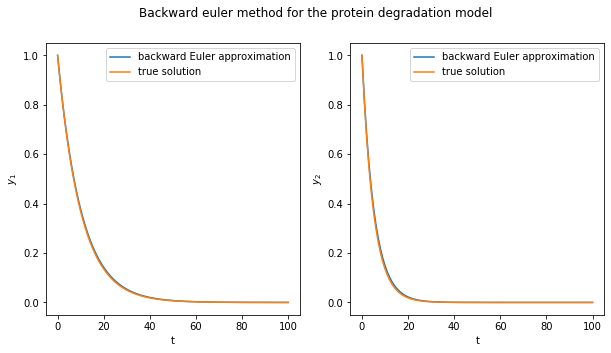

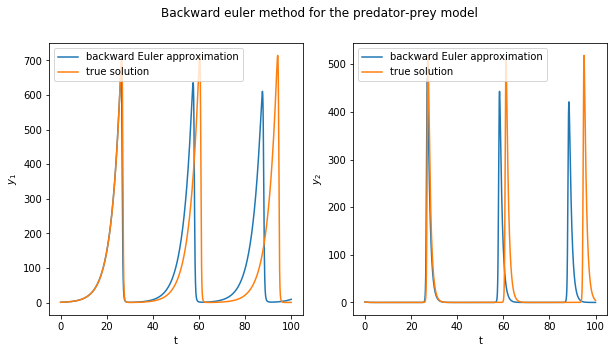

In [33]:
#Protein degradation+ backward Euler 
BE_1=evaluation(step=0.5,method="backward euler",ti=0,tf=100,params=params,model=proteindegradation,y0=np.array([1,1]))
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(np.arange(0,100.5,0.5),BE_1[1][0,:],label="backward Euler approximation")
ax[0].plot(np.arange(0,100.5,0.5),BE_1[2][0,:],label="true solution")
ax[1].plot(np.arange(0,100.5,0.5),BE_1[1][1,:],label="backward Euler approximation")
ax[1].plot(np.arange(0,100.5,0.5),BE_1[2][1,:],label="true solution")
ax[0].set_xlabel("t")
ax[1].set_xlabel("t")
ax[0].set_ylabel("$y_1$")
ax[1].set_ylabel("$y_2$")
ax[0].legend()
ax[1].legend()
plt.suptitle("Backward euler method for the protein degradation model")
plt.show()
#Protein degradation+ backward Euler 
BE_2=evaluation(step=0.01,method="backward euler",ti=0,tf=100,params=params2,model=predatorprey,y0=np.array([1,1]))
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(np.arange(0,100.01,0.01),BE_2[1][0,:],label="backward Euler approximation")
ax[0].plot(np.arange(0,100.01,0.01),BE_2[2][0,:],label="true solution")
ax[1].plot(np.arange(0,100.01,0.01),BE_2[1][1,:],label="backward Euler approximation")
ax[1].plot(np.arange(0,100.01,0.01),BE_2[2][1,:],label="true solution")
ax[0].set_xlabel("t")
ax[1].set_xlabel("t")
ax[0].set_ylabel("$y_1$")
ax[1].set_ylabel("$y_2$")
ax[0].legend()
ax[1].legend()
plt.suptitle("Backward euler method for the predator-prey model")
plt.show()


#### 2. The Adams-Bashford method 
The  Adams-Bashford requires one aditional input (step - not to confuse with time step $h$)

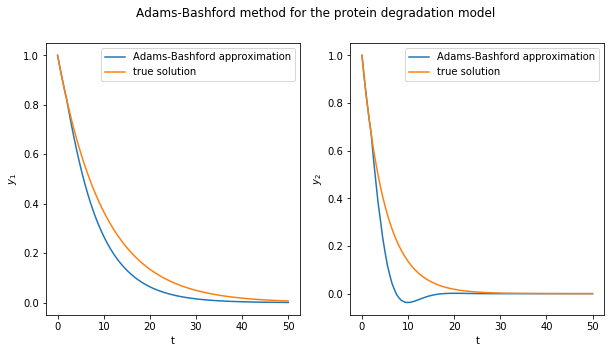

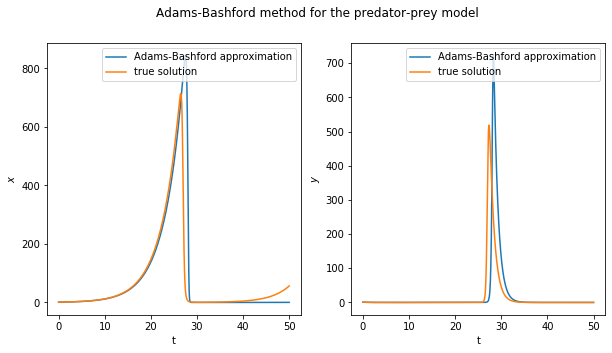

In [34]:
#Protein degradation+ Adams Bathford, step=5
BE_1=evaluation(step=5,method="AB",ti=0,tf=50,params=params,model=proteindegradation,y0=np.array([1,1]),h=0.5)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(np.arange(0,50.5,0.5),BE_1[1][0,:],label="Adams-Bashford approximation")
ax[0].plot(np.arange(0,50.5,0.5),BE_1[2][0,:],label="true solution")
ax[1].plot(np.arange(0,50.5,0.5),BE_1[1][1,:],label="Adams-Bashford approximation")
ax[1].plot(np.arange(0,50.5,0.5),BE_1[2][1,:],label="true solution")
ax[0].set_xlabel("t")
ax[1].set_xlabel("t")
ax[0].set_ylabel("$y_1$")
ax[1].set_ylabel("$y_2$")
ax[0].legend()
ax[1].legend()
plt.suptitle("Adams-Bashford method for the protein degradation model")
plt.show()
BE_2=evaluation(step=5,method="AB",ti=0,tf=50,params=params2,model=predatorprey,y0=np.array([1,1]),h=0.01)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(np.arange(0,50.01,0.01),BE_2[1][0,:],label="Adams-Bashford approximation")
ax[0].plot(np.arange(0,50.01,0.01),BE_2[2][0,:],label="true solution")
ax[1].plot(np.arange(0,50.01,0.01),BE_2[1][1,:],label="Adams-Bashford approximation")
ax[1].plot(np.arange(0,50.01,0.01),BE_2[2][1,:],label="true solution")

ax[0].set_xlabel("t")
ax[1].set_xlabel("t")
ax[0].set_ylabel("$x$")
ax[1].set_ylabel("$y$")
ax[0].legend()
ax[1].legend()
plt.suptitle("Adams-Bashford method for the predator-prey model")
plt.show()


### 5. Adaptive forward euler method 


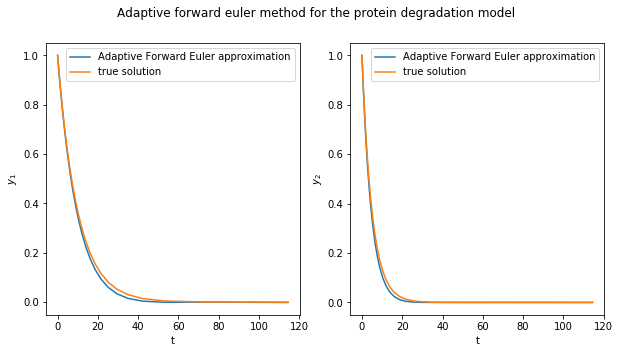

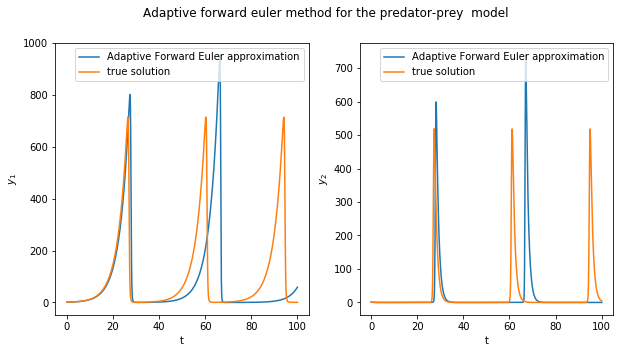

In [36]:
#Protein degradation+ adaptive Forward Euler 
t,ys,err,true,run=evaluation(step=0.5,method="adaptiveFE",ti=0,tf=100,params=params,model=proteindegradation,y0=np.array([1,1]))
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(t,ys[0,:],label="Adaptive Forward Euler approximation")
ax[0].plot(t,true[0,:],label="true solution")
ax[1].plot(t,ys[1,:],label="Adaptive Forward Euler approximation")
ax[1].plot(t,true[1,:],label="true solution")
ax[0].set_xlabel("t")
ax[1].set_xlabel("t")
ax[0].set_ylabel("$y_1$")
ax[1].set_ylabel("$y_2$")
ax[0].legend()
ax[1].legend()
plt.suptitle("Adaptive forward euler method for the protein degradation model")
plt.show()
#Protein degradation+ adaptive Forward Euler 
t2,ys2,err2,true2,run=evaluation(step=0.5,method="adaptiveFE",ti=0,tf=100,params=params2,model=predatorprey,y0=np.array([1,1]))
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(t2,ys2[0,:],label="Adaptive Forward Euler approximation")
ax[0].plot(t2,true2[0,:],label="true solution")
ax[1].plot(t2,ys2[1,:],label="Adaptive Forward Euler approximation")
ax[1].plot(t2,true2[1,:],label="true solution")
ax[0].set_xlabel("t")
ax[1].set_xlabel("t")
ax[0].set_ylabel("$y_1$")
ax[1].set_ylabel("$y_2$")
ax[0].legend()
ax[1].legend()
plt.suptitle("Adaptive forward euler method for the predator-prey  model")
plt.show()

The adaptive forward euler performs relatively well on the protein degradation model, yet it performs terribly on the second model. Similar to the first two methods, there seems to be a shifted approximation using the adaptive forward euler. Here we only graph using the [0,100] time frame, but things can get worse as we expand the time span. 

### IV. Sensitivity analysis 
#### 1. Impact of h on the performance of the methods using model 2 (predator-prey)
As we tried out different values of $h$, we realize that not all value of $h$ will allow the algorithms to run smoothly. A specific combination of the model and the value of $h$ won't be inducive to a flawless algorithm. For example, we realize that a $h=0.5$, together with the predator-prey model, introduces some error throughout the run of most if not all methods, i.e. overflow error. This is caused when the approximated $y$ gets too large that it exceeds Python maximum threshold. 
Below we use multiple value of $h$, from as small as $0.3$ to $1$, to illustrate this effect. Of course, only some very first values will be selected from the approximated solution, to make the graph interpretable. We will keep the very first value of y that does not exceed 2000.


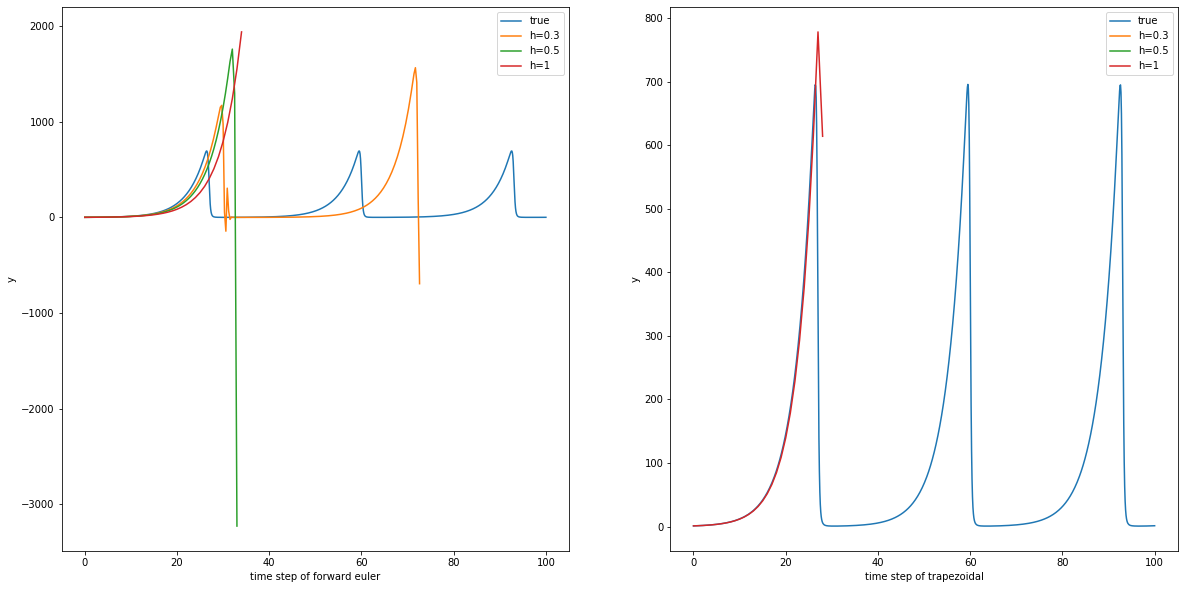

In [40]:
import warnings
warnings.filterwarnings('ignore')
# step  varies  (to demonstrate an error)
h_err=[0.3,0.5,1]
true=evaluation(step=0.1,method="forward euler",ti=0,tf=100,params=params2,model=predatorprey,y0=np.array([1,2]),h=0.5)
method=["forward euler","trapezoidal"]
ytrue=true[2][0,:]
fig,ax=plt.subplots(1,2,figsize=(20,10))
for j in range(0,2):
    ax[j].plot(np.arange(0,100.1,0.1),ytrue,label="true")

    for i in h_err:
        
        BE_2=evaluation(step=i,method=method[j],ti=0,tf=100,params=params2,model=predatorprey,y0=np.array([1,2]),h=i)

        #get only the solutions <1e+3:
        y_right=BE_2[1][0,:]
        y_right_index=np.argmax(y_right>2000)
        y_right=y_right[:y_right_index]
        t_right=np.arange(0,i*y_right.shape[0],i)
        ax[j].plot(t_right,y_right,label="h="+str(i))
        ax[j].set_xlabel("time step of " +method[j])
        ax[j].set_ylabel("y")

        ax[j].legend()
plt.show()

As we can see from the plot on the left, the approximated ys are quite correct at the beginning, when the line is still flat. However, as y approaches the "narrow peak" regions, the approximations are totally off. Some of the solution (for example when h=0.5) get blown  and completely out of its normal range (it even gets negative). These can be seen as a domino effect. When the step size is considerably large, the method assigns an underestimated value for the next step (as can be seen from the red line under the true solution). While the approximation is at work under the "peak" regions,  small erroneous approximation leads to another bigger erroneous approximation in the next step. In the long run, this can lead to the full-blown value as illustrated. 

The explicit trapezoidal method doesn't seem to suffer that much from this effect. This might be because the trapezoidal predicts the next point by taking into account the FE approximation of the next step and the slope of the current step. Thus, it might serve as a means to correct for a significant increase in y. 
Thus, the trapezoidal method is quite effective at dealing with model that has sudden peak in its slope.

#### 2. Does the rtol affects mse of the backward Euler method? 
Since the backward Euler method utilizies the Newton method to solve for y at every instance of $t$, we are interested in evaluating the effect of the tolerence on the accuracy of the solution. Using step=0.5 and different values of rtol, we  see that there is no impact on the performance of the BE method. The value is chosen from as small as $1e-10$ to $1e-2$. 

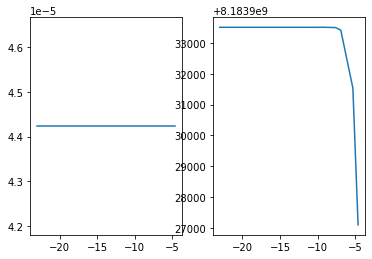

In [103]:
mse_BE1=[]
mse_BE2=[]
fig,ax =plt.subplots(1,2)
for i in epsilon:
    BE_1=evaluation(step=0.5,method="backward euler",ti=0,tf=50,params=params,model=proteindegradation,y0=np.array([1,1]),epsilon=i)
    mse_BE1.append(BE_1[0])
    BE_2=evaluation(step=0.5,method="backward euler",ti=0,tf=50,params=params2,model=predatorprey,y0=np.array([1,1]),epsilon=i)
    mse_BE2.append(BE_2[0])
ax[0].plot(np.log(epsilon),mse_BE1)
ax[1].plot(np.log(epsilon),mse_BE2)
plt.show()

We can see that the effect of rtol on mse is not very eminent. For example, the mse from the protein degradation model seems to be independent of the rtol value. This is some what the same with the predator-prey model. Thought it looks as if rtol affects mse, the y-axis is of the scale of $8e-9$, so the effect is neglible. 

### V. Benchmarking performance

#### 1. Forward euler, backward euler, trapezoidal 
In this section we analyze the accuracy and run-time of FE,BE, and Trapezoidal, using the same time step. We also see how the time step affects each method seperately. 


In [92]:
h=[5e-5,1e-4,5e-4,0.001,0.002, 0.005,0.01,0.02,0.03]

BE1_stat=[]
BE2_stat=[]
FE1_stat=[]
FE2_stat=[]
t1_stat=[]
t2_stat=[]
AB1_stat=[]

AB2_stat=[]
for i in h:
    #protein degradation:
    BE_1=evaluation(step=i,method="backward euler",ti=0,tf=50,params=params,model=proteindegradation,y0=np.array([1,1]),epsilon=0.005)
    FE_1=evaluation(step=i,method="forward euler",ti=0,tf=50,params=params,model=proteindegradation,y0=np.array([1,1]),epsilon=0.005)
    t1=evaluation(step=i,method="trapezoidal",ti=0,tf=50,params=params,model=proteindegradation,y0=np.array([1,1]),epsilon=0.005)
    ab1=evaluation(step=2,h=i/2,method="trapezoidal",ti=0,tf=50,params=params,model=proteindegradation,y0=np.array([1,1]),epsilon=0.005)

    BE1_stat.append([BE_1[0],BE_1[3]])
    FE1_stat.append([FE_1[0],FE_1[3]])
    AB1_stat.append([ab1[0],ab1[3]])
    t1_stat.append([t1[0],t1[3]])
    #predator-prey:
    BE_2=evaluation(step=i/2,method="backward euler",ti=0,tf=50,params=params2,model=predatorprey,y0=np.array([1,1]),epsilon=0.005)
    FE_2=evaluation(step=i/2,method="forward euler",ti=0,tf=50,params=params2,model=predatorprey,y0=np.array([1,1]),epsilon=0.005)
    t2=evaluation(step=i/2,method="trapezoidal",ti=0,tf=50,params=params2,model=predatorprey,y0=np.array([1,1]),epsilon=0.005)
    ab2=evaluation(step=2,h=i/2,method="trapezoidal",ti=0,tf=50,params=params2,model=predatorprey,y0=np.array([1,1]),epsilon=0.005)

    BE2_stat.append([BE_2[0],BE_2[3]])
    FE2_stat.append([FE_2[0],FE_2[3]])
    AB2_stat.append([ab2[0],ab2[3]])

    t2_stat.append([t2[0],t2[3]])
    

In [93]:
#Convert them to Numpy array for easier visualization and manipulation:
BE1_stat=np.array(BE1_stat)
BE2_stat=np.array(BE2_stat)
FE1_stat=np.array(FE1_stat)
FE2_stat=np.array(FE2_stat)
t1_stat=np.array(t1_stat)
t2_stat=np.array(t2_stat)
AB1_stat=np.array(AB1_stat)
AB2_stat=np.array(AB2_stat)



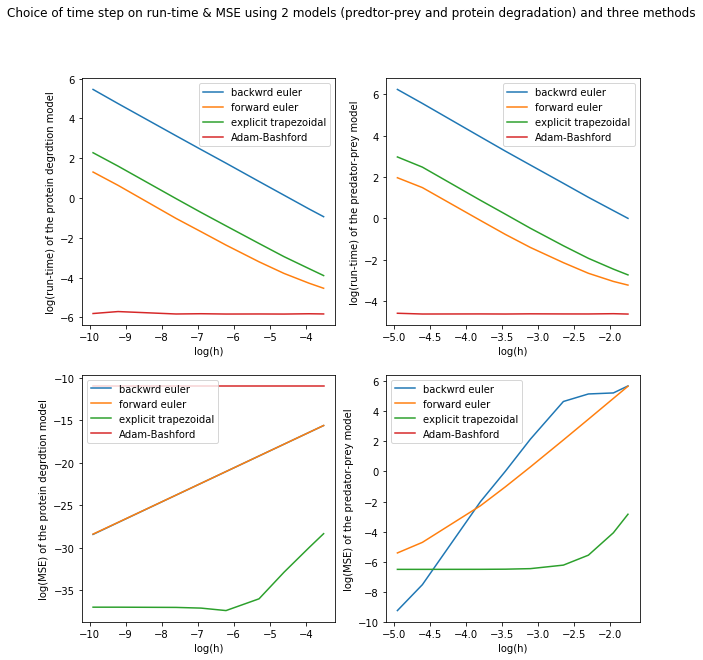

In [112]:
fig,ax =plt.subplots(2,2,figsize=(10,10))
ax[0][0].plot(np.log(h),np.log(BE1_stat[:,1]),label="backwrd euler")
ax[0][0].plot(np.log(h),np.log(FE1_stat[:,1]),label="forward euler")
ax[0][0].plot(np.log(h),np.log(t1_stat[:,1]),label="explicit trapezoidal")
ax[0][0].plot(np.log(h),np.log(AB1_stat[:,1]),label="Adam-Bashford")

ax[0][0].set_ylabel("log(run-time) of the protein degrdtion model")
ax[0][1].set_ylabel("log(run-time) of the predator-prey model")

ax[0][0].set_xlabel("log(h)")
ax[0][1].set_xlabel("log(h)")

ax[0][1].plot(np.log(h)/2,np.log(BE2_stat[:,1]),label="backwrd euler")
ax[0][1].plot(np.log(h)/2,np.log(FE2_stat[:,1]),label="forward euler")
ax[0][1].plot(np.log(h)/2,np.log(t2_stat[:,1]),label="explicit trapezoidal")
ax[0][1].plot(np.log(h)/2,np.log(AB2_stat[:,1]),label="Adam-Bashford")

#######################
ax[1][0].plot(np.log(h),np.log(BE1_stat[:,0]),label="backwrd euler")
ax[1][0].plot(np.log(h),np.log(FE1_stat[:,0]),label="forward euler")
ax[1][0].plot(np.log(h),np.log(t1_stat[:,0]),label="explicit trapezoidal")
ax[1][0].plot(np.log(h),np.log(AB1_stat[:,0]),label="Adam-Bashford")

ax[1][0].set_ylabel("log(MSE) of the protein degrdtion model")
ax[1][1].set_ylabel("log(MSE) of the predator-prey model")

ax[1][0].set_xlabel("log(h)")
ax[1][1].set_xlabel("log(h)")

ax[1][1].plot(np.log(h)/2,np.log(BE2_stat[:,0]),label="backwrd euler")
ax[1][1].plot(np.log(h)/2,np.log(FE2_stat[:,0]),label="forward euler")
ax[1][1].plot(np.log(h)/2,np.log(t2_stat[:,0]),label="explicit trapezoidal")
ax[1][1].plot(np.log(h)/2,np.log(AB2_stat[:,0]),label="Adam-Bashford")

ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

plt.suptitle("Choice of time step on run-time & MSE using 2 models (predtor-prey and protein degradation) and three methods")
plt.show()

The four plots show the impact of log(time-step) on log(MSE) and log(run-time), using four numerical methods and 2 models. Four all methods and models, when log(h) increases, log(run-time) linearly decreases. THe reverse is true for the log(h) vs log(MSE), although the explicit trapezoidal doesnt seems to be affected by log(h) when log(h) is small enough.

Here, surprisingly, we see that the explicit trapezoidal performs the best with two models, followed by the forward euler, and then the backward euler. 

In term of run-time, the AB method performs the best, although it is more of a time-accuracy trade-off here. Still, the trapezoidal method is still not the worst. The backward euler 
It seems that with a large time step, and with limited computational resource, one should opt for the explicit trapezoidal.

### 2.The impact of rtol on the adaptive FE method:
We will analyze in this section the effect of rtol on the adaptive FE's accuracy and run time. 

Using the protein degradation model, we see that as we increase the log(tolerance), the runtime decreases exponentially. Meanwhile, the MSE also increases logistically as log(tolerance) increases. This is as we expected. When a strict tolerance is used, the algorithm will try to find even smaller time step, causing the algorithm to loop more.  

In [63]:
#protein degradation model: 
accuracy=[]
runtime=[]
tstep=[]
epsilon=[1e-10,5e-10,1e-9,5e-9,1e-8,5e-8,1e-7,5e-7,1e-6,5e-6,1e-5,5e-5,1e-4,5e-4,1e-3,5e-3,1e-2]

for i in epsilon:
    adapt_i=evaluation(step=11,method="adaptiveFE",ti=0,tf=50,params=params,model=proteindegradation,y0=np.array([1,1]),epsilon=i)
    accuracy.append(adapt_i[2])
    runtime.append(adapt_i[4])
    times=adapt_i[0]
    times2=np.delete(times,-1)
    times2=np.insert(times2,0,0)
    
    tstep.append(np.mean(np.abs(times2-times)))

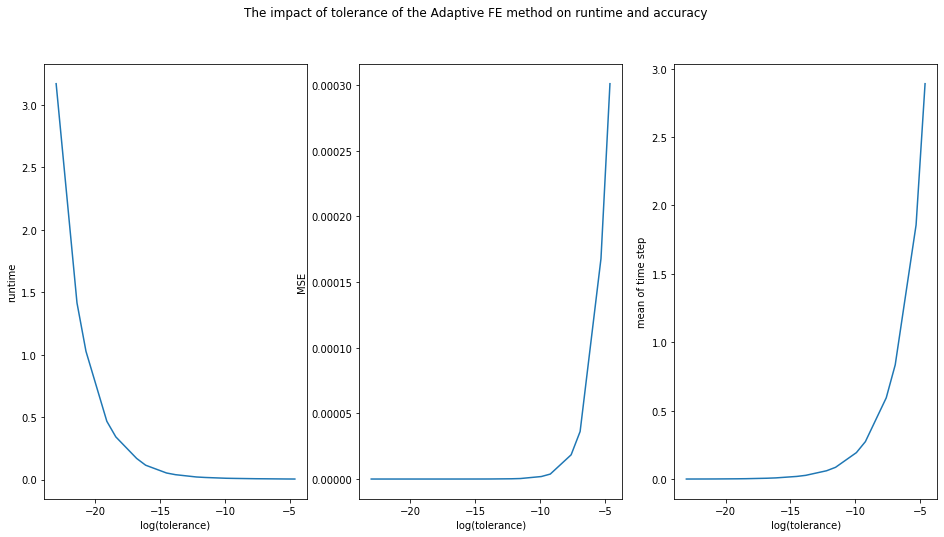

In [76]:
fig,ax=plt.subplots(1,3,figsize=(16,8))
ax[0].plot(np.log(epsilon),runtime)
ax[0].set_xlabel("log(tolerance)")
ax[0].set_ylabel("runtime")
ax[1].plot(np.log(epsilon),accuracy)

ax[1].set_xlabel("log(tolerance)")
ax[1].set_ylabel("MSE")

ax[2].plot(np.log(epsilon),tstep)

ax[2].set_xlabel("log(tolerance)")
ax[2].set_ylabel("mean of time step")
plt.suptitle("The impact of tolerance of the Adaptive FE method on runtime and accuracy")
plt.show()


The tolerance positively impacts MSE and mean of time step from the Adaptive Forward method, and negatively impacts the run-time of the algorith. The epsilon are chosen from as small as $1e-10$ to $1e-2$. THe x-axis is scaled using the log of tolerance. 

### 2.The impact of step size on the Adams-Bashford method:
Here, we use different step size (from 2 to 10) to determine its effect on the runtime and accuracy of the Adams-Bashford method. We expect that a large step size will be associated with a large MSE. This is indeed the case. As we  increase the step size, the MSE in fact increases for both model, until they reach full-blown values (6e+27 in the case of protein degradation, and NA values for predator-prey). Below we also print out the 9 values of MSEs in 2 models.
Regarding the run-time, it is expected that run-time increases as we increase the step size. This is because the process of finding the coefficients for the formula requires differentiation to find each coefficient. 

In [101]:
#protein degradation model: 
accuracy=[]
accuracy2=[]
runtime=[]
runtime2=[]
steps=range(2,11)
for i in steps:
    adapt_i=evaluation(step=i,method="AB",ti=0,tf=50,params=params,model=proteindegradation,y0=np.array([1,1]),h=0.005)
    adapt_i2=evaluation(step=i,method="AB",ti=0,tf=50,params=params2,model=predatorprey,y0=np.array([1,1]),h=0.005)

    accuracy.append(adapt_i[0])
    accuracy2.append(adapt_i2[0])

    runtime.append(adapt_i[3])
    
    runtime2.append(adapt_i2[3])


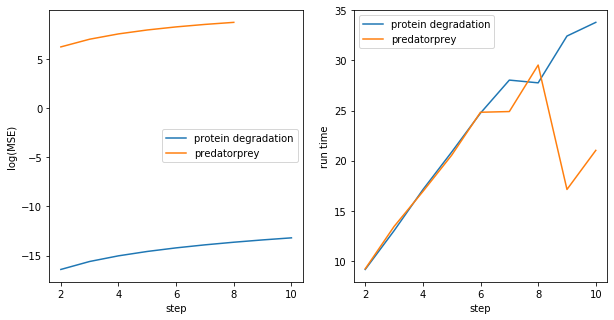

[7.496323991995989e-08, 1.6865367224139412e-07, 2.9970278471999246e-07, 4.6809043777892197e-07, 6.737707469595106e-07, 9.166979926586106e-07, 1.1968266514036603e-06, 1.5141113957614593e-06, 1.8685070941965505e-06]
[514.6274385159436, 1126.1918615677496, 1931.973313819014, 2884.0056376368702, 3941.74942826411, 5073.375387064404, 6256.306661218577, nan, nan]


In [107]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(steps,np.log(accuracy),label="protein degradation")
ax[0].plot(steps,np.log(accuracy2),label="predatorprey")
ax[0].set_xlabel("step")
ax[0].set_ylabel("log(MSE)")
ax[0].legend()

ax[1].plot(steps,runtime,label="protein degradation")
ax[1].plot(steps,runtime2,label="predatorprey")

ax[1].set_xlabel("step")
ax[1].set_ylabel("run time")
ax[1].legend()
plt.show()
print(accuracy)
print(accuracy2)

### VI. Conclusion
As we benchmark the performance of 5 methods, we conclude that the explicit trapezoidal method is the best numerical method, using our 2 models (predator-prey and protein degradation) in terms of accuracy, and its not too high run-time can be acceptable. The forward euler method can also be used if one has limited computational resource, and its accuracy is not too bad. One important warning is that one has to select the step size carefully for a model similar to the predator-prey model. This one has several narrow peaks, due to its sudden rise in slope, making it hard for the numerical method to accurately predict the shape. Thus, a small step size is preferred in this case to avoid a 'shifted' solution or absurd solution. This is dangerous because as we can see from the sensitivity analysis section, a small earlier shifts in the approximation can later contribute to an accumulative, full blown approximation that makes zero sense! The worst numerical method here is perhaps the Adams-Bashford (with step size =2, for example). Although it requires the least computational resources, it does not accurately outline true solution. 

<hr style="border:2px solid gray"> </hr>

Acknowledgements

*Replace this text with links to external resources and thanks to people you worked with.*